In [1]:
cd

C:\Users\an-user


In [2]:
cd C:\Users\an-user\Desktop\data study\graduate-admissions

C:\Users\an-user\Desktop\data study\graduate-admissions


Basic Data Information & Correction
===============

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
import seaborn as sns

In [40]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


## Two main Problems to be fixed.
1. column names are not neat
2. data types for serial number and research are not accurate.

In [42]:
list1 = df.columns.tolist()
print(list1)

university_rating
UniversityRating

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [43]:
new_columns = []
for i in range(0, len(list1)):
    new_column_name = list1[i].replace(' ', '_').lower()
    if new_column_name[-1] == '_' or new_column_name[-1] == '.':
        new_column_name = new_column_name[0:-1]
    else:
        new_column_name = new_column_name
    new_columns.append(new_column_name)

In [44]:
print(new_columns)

['serial_no', 'gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']


In [45]:
df.columns = new_columns

In [69]:
df['serial_no'] = df['serial_no'].astype('object')
df['research'] = df['research'].astype('int')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
serial_no            500 non-null object
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null int32
chance_of_admit      500 non-null float64
intercept            500 non-null int64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 37.2+ KB


In [33]:
df.to_csv('clean_data.csv')

Univariate Analysis
==================

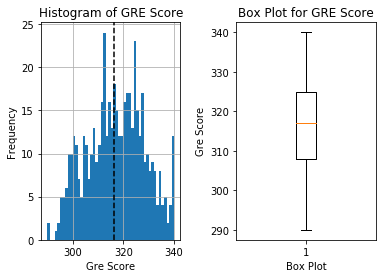

In [19]:
##Univariate Analysis of GRE Score

plt.subplot(1,2,1)

plt.hist(x = df.gre_score, bins = 50)
plt.xlabel('Gre Score')
plt.ylabel('Frequency')
plt.title('Histogram of GRE Score')
plt.grid(True)
plt.axvline(df.gre_score.mean(), color = 'k', linestyle = 'dashed')

plt.subplot(1,2,2)
plt.boxplot(df.gre_score)
plt.xlabel('Box Plot')
plt.ylabel('Gre Score')
plt.title('Box Plot for GRE Score');

plt.subplots_adjust(wspace=0.4);

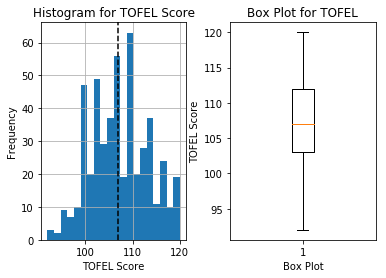

In [32]:
##Univariate Analysis of TOFEL Score

plt.subplot(1,2,1)

plt.hist(x = df.toefl_score, bins = 20)
plt.xlabel('TOFEL Score')
plt.ylabel('Frequency')
plt.title('Histogram for TOFEL Score')
plt.grid(True)
plt.axvline(df.toefl_score.median(), color = 'k', linestyle = 'dashed')

plt.subplot(1,2,2)
plt.boxplot(df.toefl_score)
plt.xlabel('Box Plot')
plt.ylabel('TOFEL Score')
plt.title('Box Plot for TOFEL')

plt.subplots_adjust(wspace = 0.3);

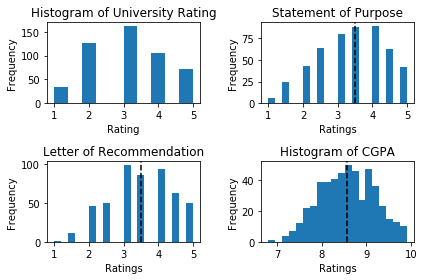

In [34]:
'university_rating', 'sop', 'lor', 'cgpa'

plt.subplot(2, 2, 1)
plt.hist(df.university_rating)
plt.title('Histogram of University Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')


plt.subplot(2, 2, 2)
plt.hist(x = df.sop, bins = 20)
plt.title('Statement of Purpose')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.axvline(df.sop.quantile(0.5), color = 'k', linestyle = 'dashed')


plt.subplot(2, 2, 3)
plt.hist(x = df.lor, bins = 20)
plt.title('Letter of Recommendation')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.axvline(df.lor.quantile(0.5), color = 'k', linestyle = 'dashed')


plt.subplot(2, 2, 4)
plt.hist(x = df.cgpa, bins = 20)
plt.title('Histogram of CGPA')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.axvline(df.cgpa.quantile(0.5), color = 'k', linestyle = 'dashed')


plt.tight_layout();




Multivariate Analysis
===============

In [6]:
df = pd.read_csv('clean_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Unnamed: 0           500 non-null int64
serial_no            500 non-null int64
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null int64
chance_of_admit      500 non-null float64
dtypes: float64(4), int64(6)
memory usage: 39.1 KB


AttributeError: 'NoneType' object has no attribute 'corr'

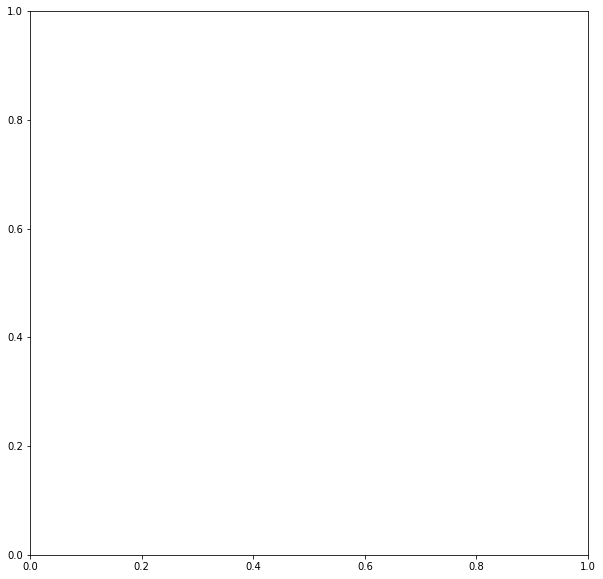

In [8]:
import seaborn as sns
df2 = df.drop(['Unnamed: 0','serial_no'], axis = 1, inplace = True)
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.title('Correlation Matrix Analysis')
plt.show()

### Hypotheses Testing


H0. Chance of admit for research group is as same as chance for research group

H1. Chance of admit for research group will be higher than chance for no research group

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Unnamed: 0           500 non-null int64
serial_no            500 non-null int64
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null int64
chance_of_admit      500 non-null float64
dtypes: float64(4), int64(6)
memory usage: 39.1 KB


In [7]:
re = df.query('research == 1')
nore = df.query('research == 0')

In [8]:
re_mean = re.chance_of_admit.mean()
nore_mean = nore.chance_of_admit.mean()
print(re_mean, nore_mean)

0.7899642857142857 0.6349090909090905


In [9]:
obs_p_diff = re_mean - nore_mean
print(obs_p_diff)

0.15505519480519514


In [10]:
research_means, no_research_means, diffs = [], [], []

for i in range(5000):
    bootsamp = df.sample(100, replace = True)
    research_mean = bootsamp[bootsamp['research'] == 1]['chance_of_admit'].mean()
    no_research_mean = bootsamp[bootsamp['research'] == 0]['chance_of_admit'].mean()
    research_means.append(research_mean)
    no_research_means.append(no_research_mean)
    diffs.append(research_mean - no_research_mean)
    

In [11]:
np.std(research_means)

0.01627556659521142

In [14]:
np.std(no_research_means)

0.01676103758712193

In [15]:
np.std(diffs)

0.023452616189278852

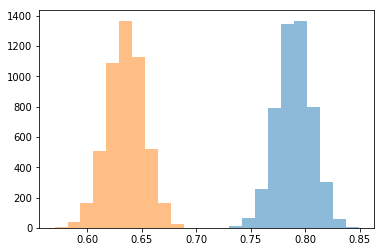

In [16]:
plt.hist(research_means, alpha = 0.5);
plt.hist(no_research_means, alpha = 0.5);

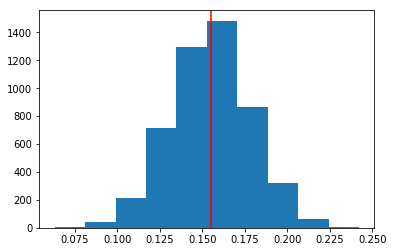

In [29]:
plt.hist(diffs)
plt.axvline(obs_p_diff, color = 'red');

In [31]:
null_vals = np.random.normal(0, np.std(diffs), 500)

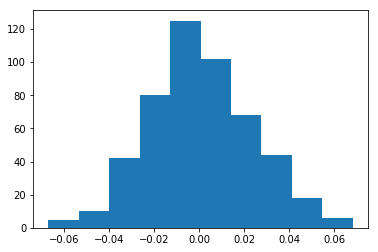

In [32]:
plt.hist(null_vals);

In [33]:
##Creating the P-value
(null_vals > obs_p_diff).mean()

0.0

## Result Summary
Since the P-value is 0.0, it is reasonable to conclude that null hypothesis is wrong. In other words, the mean of adimission rate for research group is higher than no research group. As a result, alternative hypothesis should be selected.

### Model Development

For the next step, it is important to verity if effects of variables might be different based on research or no research group. For instance, effect size of letter of recommendation could not be the same. In this point of view, every possible variables is going to be taken into account.


In [51]:
##Multiple Regression Model for Research Group

re_lm = sm.OLS(re['chance_of_admit'], re[['intercept', 'university_rating','gre_score', 'toefl_score','sop','lor','cgpa']])
result = re_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chance_of_admit   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     239.1
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          1.42e-105
Time:                        16:29:15   Log-Likelihood:                 446.14
No. Observations:                 280   AIC:                            -878.3
Df Residuals:                     273   BIC:                            -852.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.2292      0.123    -10.004      0.000      -1.471      -0.987
university_rating     0.0123      0.004      2.822      0.005       0.004       0.021
gre_score             0.0018      0.001      3.014      0.003       0.001       0.003
toefl_score           0.0029      0.001      2.921      0.004       0.001       0.005
sop                   0.0034      0.006      0.610      0.542      -0.008       0.015
lor                   0.0133      0.005      2.902      0.004       0.004       0.022
cgpa                  0.1147      0.011     10.434      0.000       0.093       0.136
==============================================================================
Omnibus:                       60.498   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.720
Skew:                          -1.065   Prob(JB):                     4.12e-29
Kurtosis:                       5.582   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
##Multiple Regression Model for No Research Group

nore_lm = sm.OLS(nore['chance_of_admit'], nore[['intercept', 'university_rating','gre_score', 'toefl_score','sop','lor','cgpa']])
result = nore_lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chance_of_admit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     55.48
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           6.53e-41
Time:                        16:29:35   Log-Likelihood:                 273.65
No. Observations:                 220   AIC:                            -533.3
Df Residuals:                     213   BIC:                            -509.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.2215      0.186     -6.570      0.000      -1.588      -0.855
university_rating    -0.0021      0.007     -0.322      0.748      -0.015       0.011
gre_score             0.0018      0.001      2.111      0.036       0.000       0.003
toefl_score           0.0027      0.002      1.715      0.088      -0.000       0.006
sop                   0.0002      0.007      0.021      0.983      -0.014       0.015
lor                   0.0218      0.008      2.890      0.004       0.007       0.037
cgpa                  0.1183      0.017      6.931      0.000       0.085       0.152
==============================================================================
Omnibus:                       42.536   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.744
Skew:                          -1.047   Prob(JB):                     7.17e-16
Kurtosis:                       4.794   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

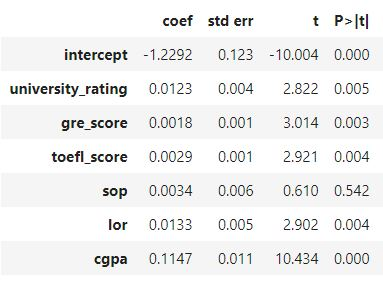

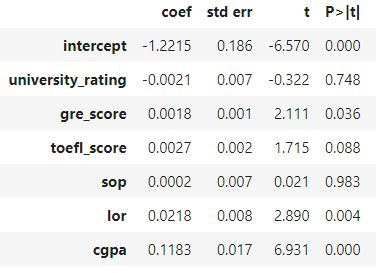

In [61]:
from IPython.display import Image
from IPython.display import display
a = Image(filename='result for research.jpg')
b = Image(filename = 'result for no research.jpg')
display(a, b)

### Point of Interest

#### 1. Different P-value of University Rating column.

University rating column's p-value for reserach group is 0.0005, whereas the same figure for no research group is 0.748. In other words, if one has academic research records, university's reputation might affect the chance of adimission. But if one does not have such history, university reputation does not count. 


#### 2. Coefficient Size Comparsion

Among significant variables, when comparing the effect size, which is coefficient, the order is as follows on each group. Research Group: CGPA > LOR > SOP > TOFEL > GRE, No Research Group: CGPA > LOR > TOFEL > GRE > SOP.

This different orders imply that in order to be accepted by graduate schools that they admire, people with academic research record should focus on CGPA, LOR and SOP but people with no such history have to focus on CGPA, LOR and TOFEL. 



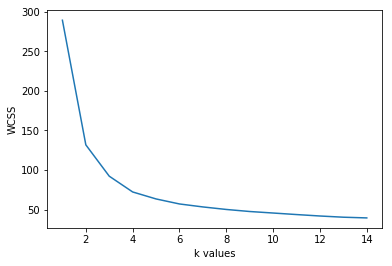

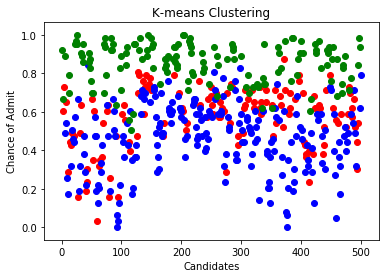

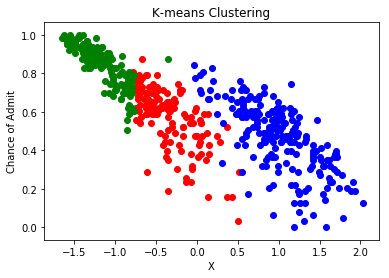

In [22]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
serial = df["Serial No."]
df.drop(["Serial No."],axis=1,inplace = True)
df = (df- np.min(df))/(np.max(df)-np.min(df))
y = df.ChanceOfAdmit 
x = df.drop(["ChanceOfAdmit"],axis=1)

from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  # whitten = normalize
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(500,)
dictionary = {"x":x_pca,"y":y}
data = pd.DataFrame(dictionary)


df["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = [] ##within-cluster sums of squares
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)

df["label_kmeans"] = clusters_knn


plt.scatter(df[df.label_kmeans == 0 ]["Serial No."],df[df.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["Serial No."],df[df.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["Serial No."],df[df.label_kmeans == 2].ChanceOfAdmit,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

df["label_kmeans"] = clusters_knn
plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

In [25]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)